In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [21]:
test = "16"
csv_path = Path(f"Output/empty/opacity/{test}/camera1_opacity_sweep.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

df = pd.read_csv(csv_path)

required_columns = {"opacity", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

df.head()


,iter,opacity,loss,analytic_grad
0,0,0.0,0.008171,-0.015438
1,1,0.1,0.006630,-0.013913
2,2,0.2,0.005252,-0.012364
3,3,0.3,0.004033,-0.010822
4,4,0.4,0.002982,-0.009280


In [22]:
import numpy as np

# ---- Edit this name if your CSV uses a different column ----
NUMERICAL_COLUMN = "numerical_opacity_grad_forward"  # forward-difference gradient

required_columns = {"opacity", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

opacity = df["opacity"].to_numpy(dtype=np.float64)
loss = df["loss"].to_numpy(dtype=np.float64)

# Forward difference: opacity/opacity at i uses (i+1 - i)
grad_fd = np.zeros_like(loss)
grad_fd[:-1] = (loss[1:] - loss[:-1]) / (opacity[1:] - opacity[:-1])

# Last point: fallback to backward difference (no i+1 available)
grad_fd[-1] = (loss[-1] - loss[-2]) / (opacity[-1] - opacity[-2])

df[NUMERICAL_COLUMN] = grad_fd

df[["iter", "opacity", "loss", NUMERICAL_COLUMN]]


,iter,opacity,loss,numerical_opacity_grad_forward
0,0,0.0,0.008171,-0.015415
1,1,0.1,0.006630,-0.013775
2,2,0.2,0.005252,-0.012195
3,3,0.3,0.004033,-0.010509
4,4,0.4,0.002982,-0.008940
5,5,0.5,0.002088,-0.007274
6,6,0.6,0.001360,-0.005632
7,7,0.7,0.000797,-0.004045
8,8,0.8,0.000393,-0.002412
9,9,0.9,0.000152,-0.000742


PosixPath('Output/empty/opacity/16/camera1_opacity_sweep_grad_subplots.png')

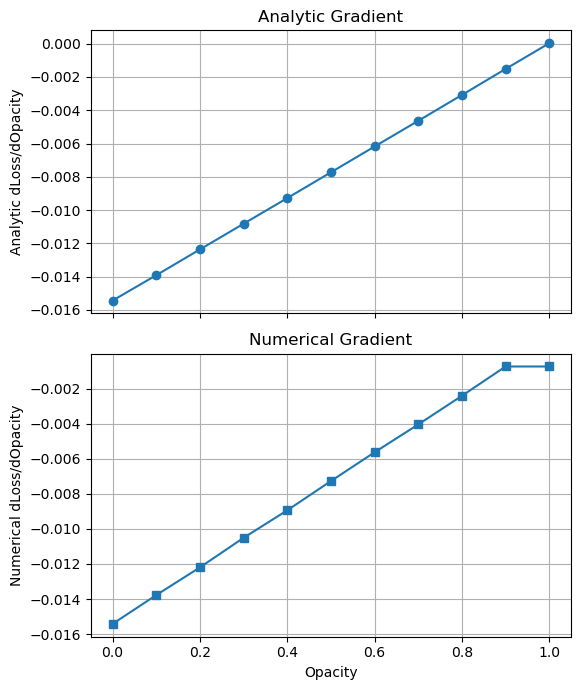

In [23]:
# ---- Edit this if your CSV uses a different column name ----

required_columns = {"iter", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 7), sharex=True)

# --- Top: Analytic ---
axes[0].plot(df["opacity"], df["analytic_grad"], marker="o")
axes[0].set_ylabel("Analytic dLoss/dOpacity")
axes[0].set_title("Analytic Gradient")
axes[0].grid(True)

# --- Bottom: Numerical ---
axes[1].plot(df["opacity"], df[NUMERICAL_COLUMN], marker="s")
axes[1].set_xlabel("Opacity")
axes[1].set_ylabel("Numerical dLoss/dOpacity")
axes[1].set_title("Numerical Gradient")
axes[1].grid(True)

output_png = csv_path.with_name(csv_path.stem + "_grad_subplots.png")
plt.tight_layout()
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png

PosixPath('Output/empty/opacity/16/camera1_opacity_sweep_grad_compare.png')

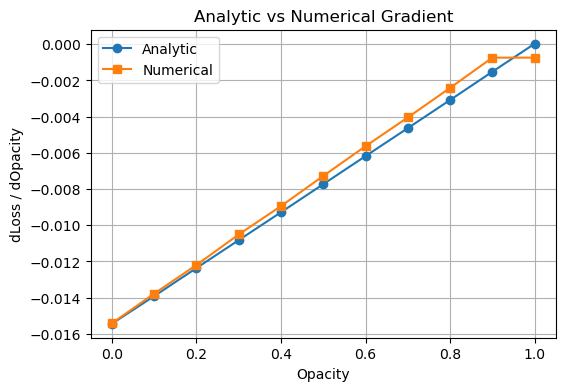

In [24]:
# ---- Edit this name if your CSV uses a different column ----

required_columns = {"iter", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

plt.figure(figsize=(6, 4))

plt.plot(df["opacity"], df["analytic_grad"], marker="o", label="Analytic")
plt.plot(df["opacity"], df[NUMERICAL_COLUMN], marker="s", label="Numerical")

plt.xlabel("Opacity")
plt.ylabel("dLoss / dOpacity")
plt.title("Analytic vs Numerical Gradient")
plt.grid(True)
plt.legend()

output_png = csv_path.with_name(csv_path.stem + "_grad_compare.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png


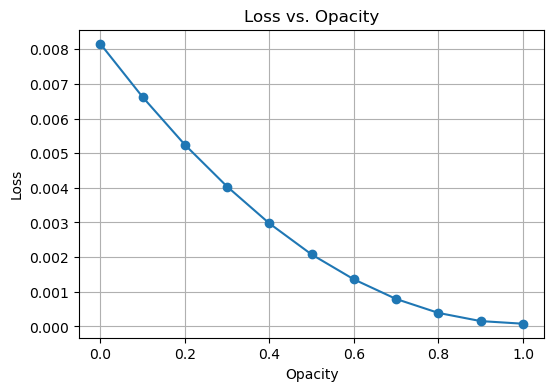

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(df["opacity"], df["loss"], marker="o")
plt.xlabel("Opacity")
plt.ylabel("Loss")
plt.title("Loss vs. Opacity")
plt.grid(True)

# Also save next to the CSV
output_png = csv_path.with_suffix(".png")
#plt.savefig(output_png, dpi=200, bbox_inches="tight")

#output_png


## BETA PARAMETER

In [198]:
test = "12"
csv_path = Path(f"Output/empty/beta/{test}/camera1_beta_sweep.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"CSV file not found: {csv_path}")

df = pd.read_csv(csv_path)

required_columns = {"beta", "loss"}
if not required_columns.issubset(df.columns):
    print(df.columns)
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

df.head()


,iter,beta,loss,analytic_grad
0,0,6.0,0.004800,0.000002
1,1,5.7,0.004800,0.000002
2,2,5.4,0.004799,0.000003
3,3,5.1,0.004798,0.000004
4,4,4.8,0.004796,0.000006


In [199]:
import numpy as np

# ---- Edit this name if your CSV uses a different column ----
NUMERICAL_COLUMN = "numerical_beta_grad_forward"  # forward-difference gradient

required_columns = {"beta", "loss"}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

beta = df["beta"].to_numpy(dtype=np.float64)
loss = df["loss"].to_numpy(dtype=np.float64)

# Forward difference: dLoss/dBeta at i uses (i+1 - i)
grad_fd = np.zeros_like(loss)
grad_fd[:-1] = (loss[1:] - loss[:-1]) / (beta[1:] - beta[:-1])

# Last point: fallback to backward difference (no i+1 available)
grad_fd[-1] = (loss[-1] - loss[-2]) / (beta[-1] - beta[-2])

df[NUMERICAL_COLUMN] = grad_fd

df[["iter", "beta", "loss", NUMERICAL_COLUMN]]


,iter,beta,loss,numerical_beta_grad_forward
0,0,6.0,0.004800,0.000002
1,1,5.7,0.004800,0.000003
2,2,5.4,0.004799,0.000003
3,3,5.1,0.004798,0.000005
4,4,4.8,0.004796,0.000007
5,5,4.5,0.004794,0.000009
6,6,4.2,0.004792,0.000012
7,7,3.9,0.004788,0.000017
8,8,3.6,0.004783,0.000023
9,9,3.3,0.004776,0.000031


PosixPath('Output/empty/beta/12/camera1_beta_sweep_grad_compare.png')

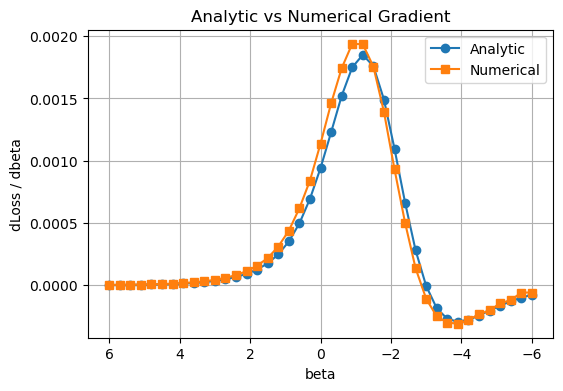

In [200]:
required_columns = {"iter", "analytic_grad", NUMERICAL_COLUMN}
if not required_columns.issubset(df.columns):
    raise RuntimeError(f"CSV must contain columns: {required_columns}")

plt.figure(figsize=(6, 4))

plt.plot(df["beta"], df["analytic_grad"], marker="o", label="Analytic")
plt.plot(df["beta"], df[NUMERICAL_COLUMN], marker="s", label="Numerical")

plt.xlabel("beta")
plt.ylabel("dLoss / dbeta")
plt.title("Analytic vs Numerical Gradient")
plt.grid(True)
plt.gca().invert_xaxis()
plt.legend()

output_png = csv_path.with_name(csv_path.stem + "_grad_compare.png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")

output_png


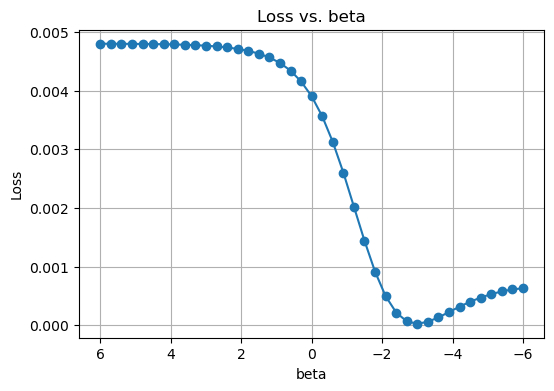

In [201]:
plt.figure(figsize=(6, 4))
plt.plot(df["beta"], df["loss"], marker="o")
plt.xlabel("beta")
plt.ylabel("Loss")
plt.title("Loss vs. beta")
plt.grid(True)
plt.gca().invert_xaxis()

# Also save next to the CSV
output_png = csv_path.with_suffix(".png")
plt.savefig(output_png, dpi=200, bbox_inches="tight")
